In [39]:
import numpy as np
from scipy import special
import matplotlib as mpl
import matplotlib.pyplot as plt


hnd=open("kerr","r")
hnd2=open("kerr2","r")

datos1=[[float(n) for n in line.split()] for line in hnd]
datos2=[[float(n) for n in line.split()] for line in hnd2]
hnd.close()
hnd2.close()

i2=np.array(datos1)
i1=np.array(datos2)

print(i1)
print('\n')
print(i2)
print('\n')


[[-5.000000e+01  2.107990e-02  2.115956e-02]
 [-4.500000e+01  2.112330e-02  2.115598e-02]
 [-4.000000e+01  2.112411e-02  2.117185e-02]
 [-3.500000e+01  2.114010e-02  2.119963e-02]
 [-3.000000e+01  2.113171e-02  2.119716e-02]
 [-2.500000e+01  2.117385e-02  2.121252e-02]
 [-2.000000e+01  2.116919e-02  2.122851e-02]
 [-1.500000e+01  2.115811e-02  2.123881e-02]
 [-1.000000e+01  2.115213e-02  2.124400e-02]
 [-5.000000e+00  2.116192e-02  2.128016e-02]
 [ 0.000000e+00  2.114990e-02  2.141496e-02]
 [ 5.000000e+00  2.116243e-02  2.143225e-02]
 [ 1.000000e+01  2.119768e-02  2.143544e-02]
 [ 1.500000e+01  2.130328e-02  2.144596e-02]
 [ 2.000000e+01  2.143133e-02  2.144132e-02]
 [ 2.500000e+01  2.147458e-02  2.143902e-02]
 [ 3.000000e+01  2.147024e-02  2.141541e-02]
 [ 3.500000e+01  2.145618e-02  2.141462e-02]
 [ 4.000000e+01  2.144981e-02  2.145061e-02]
 [ 4.500000e+01  2.146040e-02  2.144550e-02]
 [ 5.000000e+01  2.145376e-02  2.144357e-02]]


[[-5.000000e+01  6.148662e-03  6.118926e-03]
 [-4.50

In [40]:
#creacion de los arreglos con los datos
Ipos=np.array([i1[:,1],-1*i2[:,1]])
Ineg=np.array([i1[:,2],-1*i2[:,2]])
B=np.array(i1[:,0])
#============================================================================================
Ipos.shape
BT=B.transpose()
IposT=Ipos.transpose()
InegT=Ineg.transpose()

In [41]:
#parametros de la medicion
delta=(5.*np.pi)/9; psi=(13.*np.pi)/90
fase=2.405

j0=special.jv(0,fase)
j1=special.jv(1,fase)
j2=special.jv(2,fase)
#==================================================
#a11=2*np.sqrt(2)*j1*np.tan(psi)*np.cos(delta); a12= 2*np.sqrt(2)*j1*np.tan(psi)*np.sin(delta)
#a21=-2*np.sqrt(2)*j2*np.tan(psi)*np.sin(delta); a22=2*np.sqrt(2)*j2*np.tan(psi)*np.cos(delta)
a11=4*j1*np.tan(psi)*np.sin(delta); a12= -4*j1*np.tan(psi)*np.cos(delta)
a21=-4*j2*np.tan(psi)*np.cos(delta); a22=-4*j2*np.tan(psi)*np.sin(delta)
a=np.array([[a11, a12],[a21 ,a22]])
Ipos[:,1]
#print(np.linalg.solve(a, Ineg[:,2]))
#print (np.linalg.solve(a, Ineg[:,17]))
#print(np.linalg.solve(a, Ipos[:,2]))
#print (np.linalg.solve(a, Ipos[:,17]))

array([ 0.0211233 , -0.00614795])

In [42]:
tamaño=Ipos.shape[1]
def solv(a,b):
    angulo=np.zeros(tamaño); elip=np.zeros(tamaño)
    for i in np.arange(0,tamaño,1):
        sol=np.linalg.solve(a,b[:,i])
        angulo[i]=sol[1]; elip[i]=sol[0]
    return angulo, elip

In [43]:
#parte de la direccion positiva
angpos, elippos = solv(a,Ipos)
#parte dir negativa
angneg, elipneg = solv(a,Ineg)

[]

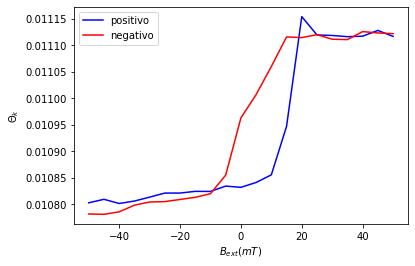

In [44]:
#graficas angulo
fig, ax = plt.subplots()
ax.plot(B,angpos, color="blue", label="positivo" )
ax.plot(B,angneg, color="red", label="negativo" )
ax.set_xlabel("$B_{ext} (mT)$")
ax.set_ylabel("$\Theta_{k}$")
ax.legend()
ax.plot()

[]

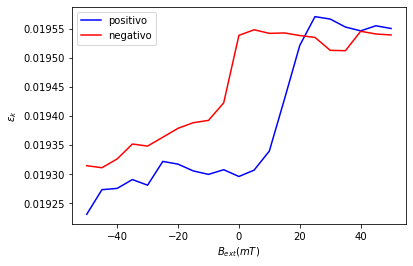

In [45]:
#graficas elipticidad
fig, ax = plt.subplots()
ax.plot(B,elippos, color="blue", label="positivo" )
ax.plot(B,elipneg, color="red", label="negativo" )
ax.set_xlabel("$B_{ext} (mT)$")
ax.set_ylabel("$\epsilon_{k}$")
ax.legend()
ax.plot()

In [50]:
datoshi=np.stack((B,angpos,elippos,angneg,elipneg), axis=-1)
np.savetxt("datHist.txt",datoshi)

In [51]:
datoshi

array([[-5.00000000e+01,  1.08026938e-02,  1.92308658e-02,
         1.07815888e-02,  1.93144580e-02],
       [-4.50000000e+01,  1.08092983e-02,  1.92732161e-02,
         1.07809703e-02,  1.93109776e-02],
       [-4.00000000e+01,  1.08013962e-02,  1.92754216e-02,
         1.07856391e-02,  1.93260663e-02],
       [-3.50000000e+01,  1.08059734e-02,  1.92906468e-02,
         1.07981837e-02,  1.93517079e-02],
       [-3.00000000e+01,  1.08133520e-02,  1.92809336e-02,
         1.08041644e-02,  1.93481768e-02],
       [-2.50000000e+01,  1.08210684e-02,  1.93218245e-02,
         1.08049509e-02,  1.93634387e-02],
       [-2.00000000e+01,  1.08210878e-02,  1.93171487e-02,
         1.08089763e-02,  1.93787613e-02],
       [-1.50000000e+01,  1.08243039e-02,  1.93054723e-02,
         1.08130103e-02,  1.93883772e-02],
       [-1.00000000e+01,  1.08241670e-02,  1.92995006e-02,
         1.08199350e-02,  1.93923599e-02],
       [-5.00000000e+00,  1.08342116e-02,  1.93075454e-02,
         1.08549015e-02